In [1]:
import os

import numpy as np
import pandas as pd

import cv2 ## Open CV

import matplotlib
from matplotlib import pyplot as plt

In [3]:
#Return BGR to RGB - https://www.pyimagesearch.com/2014/11/03/display-matplotlib-rgb-image/
def convert_BGR_to_RGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def plot_BGR_to_RGB(image,plt):
    plt.imshow(convert_BGR_to_RGB(image))

Height: 50
Width: 200
Channels:  3
Image shape:(50, 200, 3)


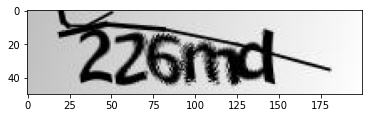

In [4]:
image_org = cv2.imread(root_dir + "226md.png")
print(f"Height: {image_org.shape[0]}")
print(f"Width: {image_org.shape[1]}")
print(f"Channels:  {image_org.shape[2]}")#RGB Channel
print(f"Image shape:{image_org.shape}") #it is generally the matrix denoted with #rows * #columns with channel
plot_BGR_to_RGB(image_org,plt)
image = image_org.copy()

Write the image back to disk

In [5]:
cv2.imwrite("226md.jpg",image)

True

## Image Basics <a id="image_basics"></a>

In [6]:
(r,g,b) = image[0,0]
(r,g,b) 

(192, 192, 192)

## Manipulating the image pixels <a id="manipulate_image"></a>

In [7]:
image[15,15] = (255,0,0) #BGR for Open CV
(r,g,b)= image[15,15]
(r,g,b)

(255, 0, 0)

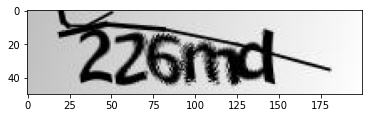

In [8]:
plot_BGR_to_RGB(image_org,plt)# you can a red dot in the image

slicing the image using the numpy array slicing, to read the portion of the image and update with different colors

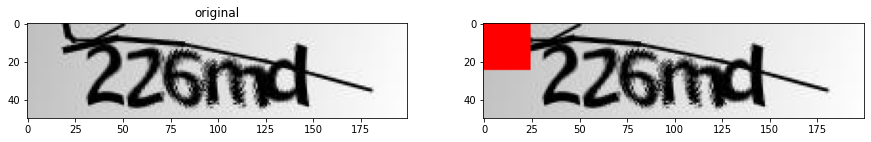

In [9]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_BGR_to_RGB(image_org,ax[0])
ax[0].imshow(image_org)#original
ax[0].set_title("original")
image[0:25,0:25] = (255,0,0)#updated the portion of the image with Red color
ax[1].imshow(image)
plot_BGR_to_RGB(image_org,ax[0])

## Drawing <a id="drawing"></a>

(-0.5, 399.5, 399.5, -0.5)

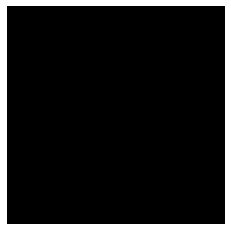

In [10]:
#(0,0,0) denotes black and we are initializing the board with black color thats why its np.zeros
board =  np.zeros(
                  (400,400,3) #shape of the image with 3 channels for RGB
                  , dtype="uint8" #type of the data
                 )

plot_BGR_to_RGB(board,plt)
plt.axis("off")

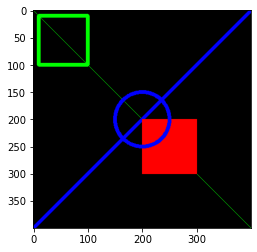

In [11]:
green=(0,255,0)
red = (255,0,0)
blue=(0,0,255)
cv2.line(board,(0,0),(400,400),green)
cv2.line(board,(0,400),(400,0),red,5) #first param - image, start and end points, color and thickness (-1 is shape fill)
cv2.rectangle(board, (10,10), (100,100), green, 5) # Draw Rectange
cv2.rectangle(board, (200,200), (300,300), blue, -1)
(centerX,centerY) = (board.shape[1] // 2, board.shape[0] // 2) # Define the center point
cv2.circle(board,(centerX,centerY),50, red, 5 )# Draw Circle
plot_BGR_to_RGB(board,plt)

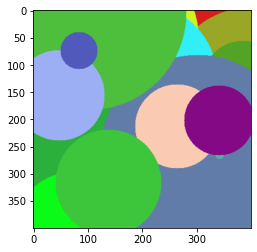

In [12]:
#(0,0,0) denotes black and we are initializing the board with black color thats why its np.zeros
new_board =  np.zeros(
                  (400,400,3) #shape of the image with 3 channels for RGB
                  , dtype="uint8" #type of the data
                 )

# Some random drawings
max_size= 400
for i in range(0,50):
    r = np.random.randint(1,200)
    color = np.random.randint(0,256,size=3).tolist()
    pt= np.random.randint(0,max_size,size=2)
    end_pt= np.random.randint(0,max_size,size=2)
    #cv2.line(new_board,tuple(pt),tuple(pt),color,3)
    #color = np.random.randint(0,256,size=3).tolist()
    #cv2.rectangle(new_board,tuple(pt),tuple(pt),color,-1)
    #color = np.random.randint(0,256,size=3).tolist()
    cv2.circle(new_board, tuple(pt) , r, color , -1)


plot_BGR_to_RGB(new_board,plt)

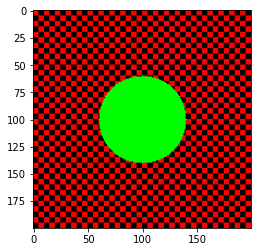

In [13]:
new_board =  np.zeros(
                  (200,200,3) #shape of the image with 3 channels for RGB
                  , dtype="uint8" #type of the data
                 ) + 255
width = 5
val = 0
for i in range(0,200,5):
    for j in range(0,200,5):
        spt = (i,j) 
        ept = (i + width,j + width)
        color = (0,0,0) if val % 2 else (0,0,255)
        cv2.rectangle(new_board,spt,ept,color, -1)
        val = val + 1
    val = val + 1
        
centerx,centery = new_board.shape[1] // 2, new_board.shape[0] // 2
cv2.circle(new_board, (centerx,centery), 40, (0,255,0) , -1)
plot_BGR_to_RGB(new_board,plt)

## Image Processing <a id="image_processing"></a>

In [14]:
#x,y denotes the pixels shift
#x - postive values shift to right and negative to left
#y - positive values shift to down and negative to up
#M - is the matrix we build to denote the shift and its direction
def translate(image, x, y):
    M = np.float32([[1,0,x],[0,1,y]])
    (h, w) = image.shape[:2]
    shifted  = cv2.warpAffine(image, M, (w,h))
    return shifted

#angle - angle to rotate
#center - point from where to rotate
#scale - to scale the image, 1.0 = original , 2.0 - double the size and 0.5 is half the size
#M - build the rotation matrix using the built in open cv method getRotationMatrix2D
def rotate(image, angle, center=None, scale =1.0):
    
    (h, w) = image.shape[:2]
    
    if center is None:
        center = w // 2, h // 2
    
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image,M,(w,h))
    
    return rotated

#width or height - along which we want to resize provide the pixel value
#aspect ratio - it is calculated based on the input of either height or width of the new image
#r - calculate the ratio from old to new value on width or height whatever is provided
#dim - build the dimension of the new image based on the input and calculated aspect ratio
# Other Interpolation - cv2.INTER_LINEAR,cv2.INTER_CUBIC, and cv2.INTER_NEAREST.
def resize(image,width=None,height=None,inter = cv2.INTER_AREA):
    
    (h,w) = image.shape[:2]
    
    if width is None and height is None:        
        return image
    
    dim = None
    
    if width is None:        
        r = height / h
        new_width = int(w * r)
        dim = (height, new_width)        
    else:
        r = width / w
        new_height = int(h * r)        
        dim = (new_height, width)
        
    resized = cv2.resize(image, dim, interpolation = inter)
        
    
    return resized

#flip_direction - 1 -horizontal, 0- vertical, -1 - both
def flip(image,flip_direction = 1):
    flipped = cv2.flip(image, flip_direction)
    return flipped

#crop - similar to numpy array slice
def crop(image, stx,endx,sty,endy):
    crop = image[sty:endy,stx:endx]
    return crop

In [15]:
image_cv = cv2.imread(cv_root_dir + 'contour_img.png')
image_cv=convert_BGR_to_RGB(image_cv)

image_cv.shape

(203, 248, 3)

Text(0.5, 1.0, 'cropped width 100,200 and height 10,40')

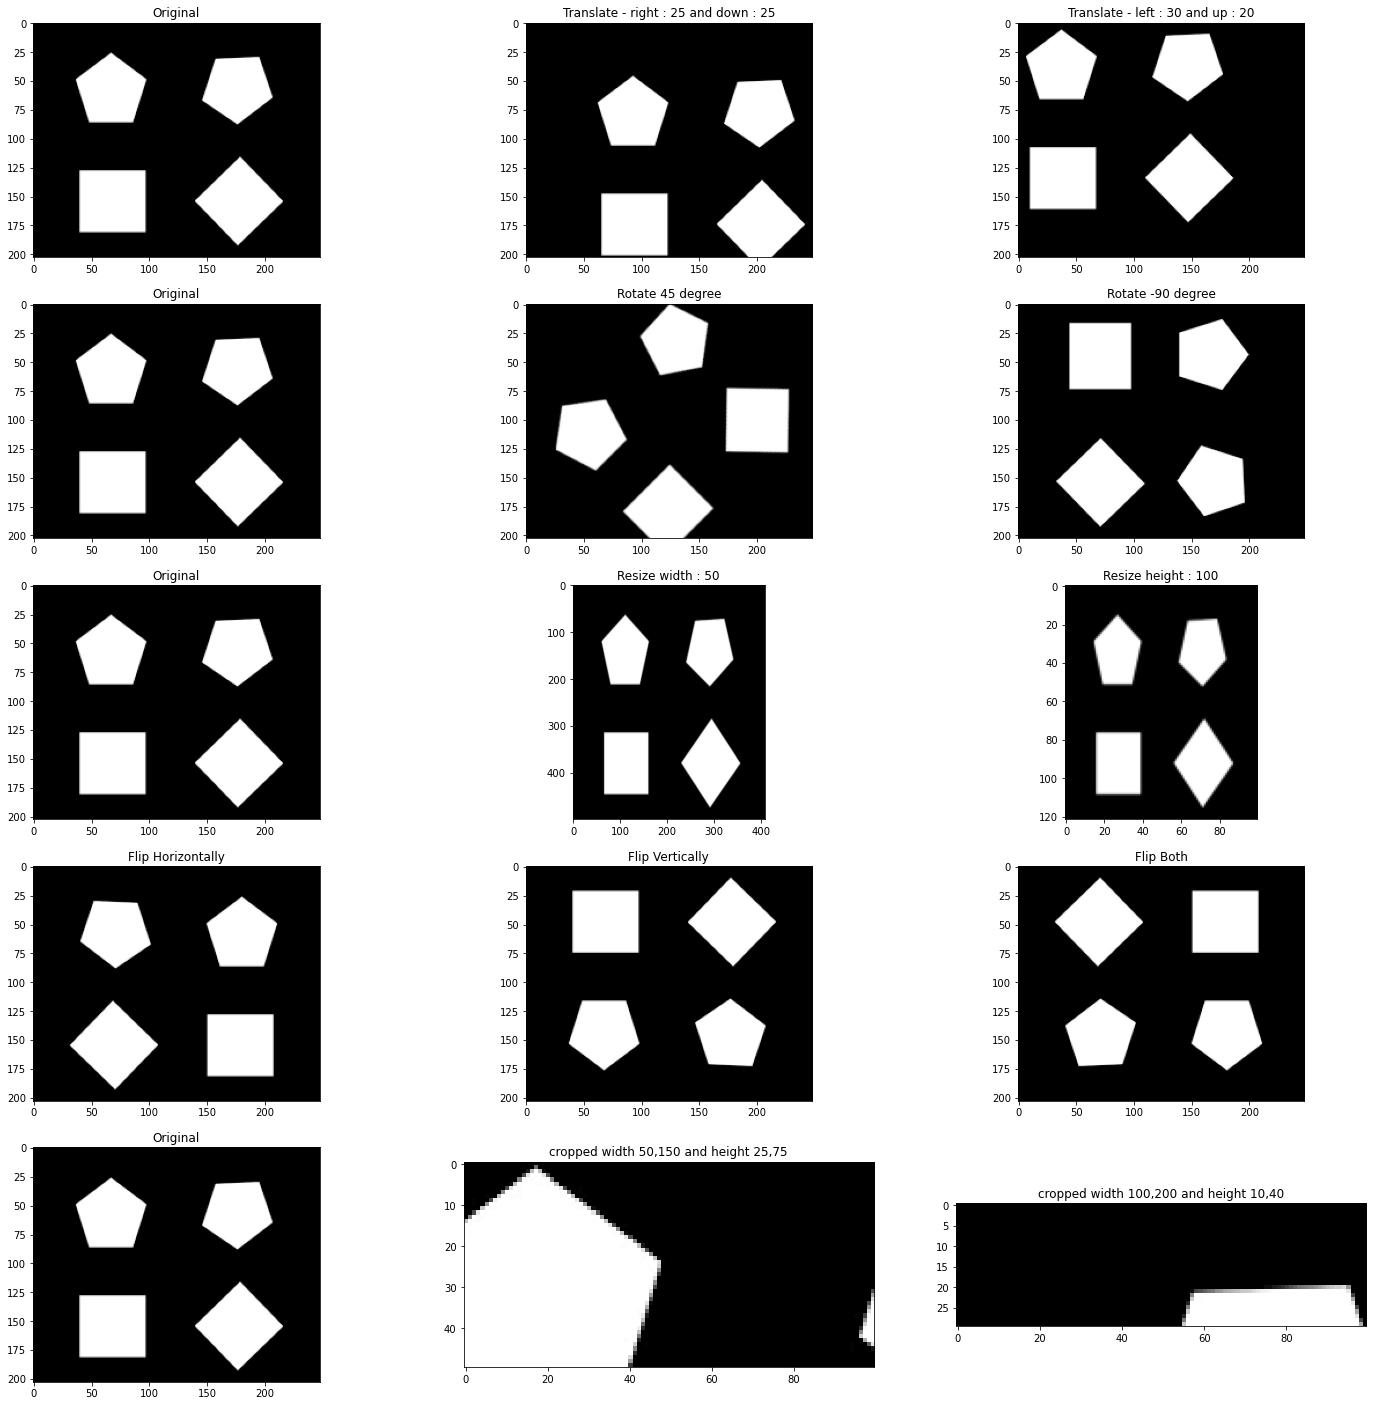

In [16]:
image = image_cv
fig,ax = plt.subplots(5,3, figsize=(25,25))
#Translate
ax[0,0].imshow(image)
ax[0,0].set_title("Original")
ax[0,1].imshow(translate(image,25,20))
ax[0,1].set_title("Translate - right : 25 and down : 25")
ax[0,2].imshow(translate(image,-30,-20))
ax[0,2].set_title("Translate - left : 30 and up : 20")
#Rotate
ax[1,0].imshow(image)
ax[1,0].set_title("Original")
ax[1,1].imshow(rotate(image,45))
ax[1,1].set_title("Rotate 45 degree")
ax[1,2].imshow(rotate(image,-90))
ax[1,2].set_title("Rotate -90 degree")
#Resize
ax[2,0].imshow(image)
ax[2,0].set_title("Original")
ax[2,1].imshow(resize(image,500))
ax[2,1].set_title("Resize width : 50")
ax[2,2].imshow(resize(image,width=None,height=100))
ax[2,2].set_title("Resize height : 100")
#Flip
ax[3,0].imshow(flip(image, 1))
ax[3,0].set_title("Flip Horizontally")
ax[3,1].imshow(flip(image,0))
ax[3,1].set_title("Flip Vertically")
ax[3,2].imshow(flip(image,-1))
ax[3,2].set_title("Flip Both")
#Crop
ax[4,0].imshow(image)
ax[4,0].set_title("Original")
ax[4,1].imshow(crop(image,50,150,25,75))
ax[4,1].set_title("cropped width 50,150 and height 25,75")
ax[4,2].imshow(crop(image,100,200,10,40))
ax[4,2].set_title("cropped width 100,200 and height 10,40")

## Image Arithmetic <a id="image_arithmetic"></a>

In [17]:
#OpenCV
print(f"Addition of the 200 + 100 in Open CV: {cv2.add(np.uint8([200]),np.uint8([100]))} restricts to 255" )
print('-'*10)
print(f"Substraction of the 50 - 100 in Open CV: {cv2.subtract(np.uint8([50]),np.uint8([100]))} restricts to 0")
print('*'*100)
#Numpy
print(f"Addition of the 200 + 100 in Numpy: {np.add(np.uint8([200]),np.uint8([100]))} takes modulo")
print('-'*10)
print(f"Substraction of the 50 - 100 in Numpy: {np.subtract(np.uint8([50]),np.uint8([100]))} takes modulo")

Addition of the 200 + 100 in Open CV: [[255]] restricts to 255
----------
Substraction of the 50 - 100 in Open CV: [[0]] restricts to 0
****************************************************************************************************
Addition of the 200 + 100 in Numpy: [44] takes modulo
----------
Substraction of the 50 - 100 in Numpy: [206] takes modulo


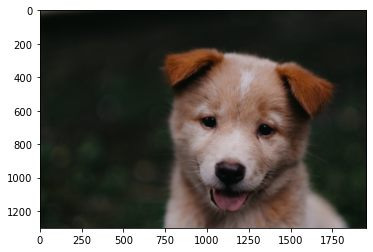

In [18]:
image_cv = cv2.imread(cv_root_dir + '00-puppy.jpg')
image_cv = convert_BGR_to_RGB(image_cv)
plt.imshow(image_cv)

As we increase the pixel values picture became more brighter than original and viceversa as decrease the pixel values became darker, however different results compared to opencv with numpy because of the modulo as explaned above


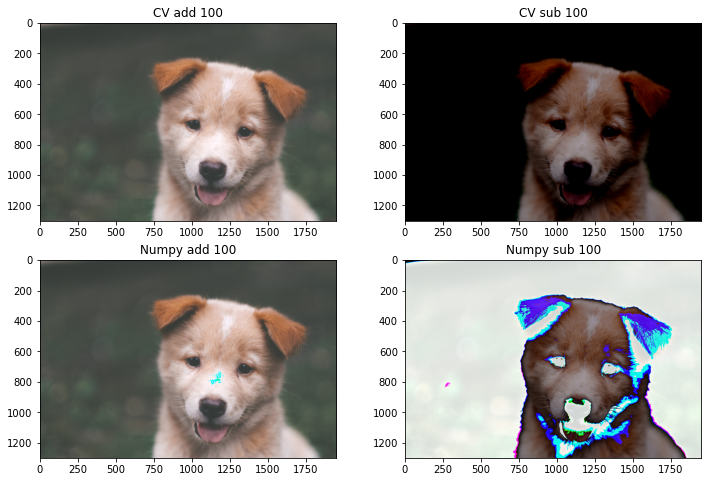

In [19]:
#Lets first build a matrix of same shape as image with values of 100
M = np.ones(image_cv.shape,dtype="uint8") * 50 #matrix with 100 as values with the same shape as image
#Open CV
cv2_add = cv2.add(image_cv, M)
cv2_sub = cv2.subtract(image_cv, M)
#Numpy
np_add = np.add(image_cv, M)
np_sub = np.subtract(image_cv, M)

fig,ax = plt.subplots(2,2,figsize=(12,8))
ax[0,0].imshow(cv2_add)
ax[0,0].set_title("CV add 100")
ax[0,1].imshow(cv2_sub)
ax[0,1].set_title("CV sub 100")
ax[1,0].imshow(np_add)
ax[1,0].set_title("Numpy add 100")
ax[1,1].imshow(np_sub)
ax[1,1].set_title("Numpy sub 100")

print("As we increase the pixel values picture became more brighter than original and viceversa as decrease the pixel values",
      "became darker, however different results compared to opencv with numpy because of the modulo as explaned above")

## Bitwise operations <a id="bitwise"></a>

(-0.5, 299.5, 299.5, -0.5)

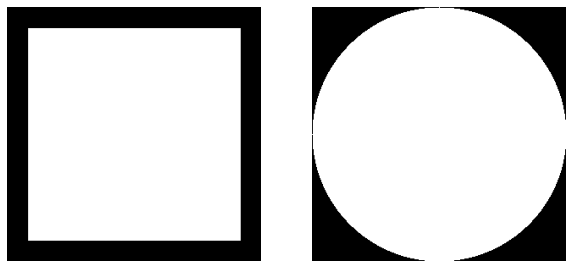

In [20]:
#create image data
rect = np.zeros((300,300) , dtype="uint8")
cv2.rectangle(rect,(25,25),(275,275), 255, -1) # 250 by 250 rectangle , white color as fill color
rect = convert_BGR_to_RGB(rect)

cir = np.zeros((300,300) ,dtype="uint8")
cv2.circle(cir,(150,150),150,255,-1)#Circle in center 150,150 pnt, radius - 100 and white color as fill color, thickness =1
cir = convert_BGR_to_RGB(cir)
#Plot
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(rect)
ax[0].axis("off")
ax[1].imshow(cir)
ax[1].axis("off")

Text(0.5, 1.0, 'NOT')

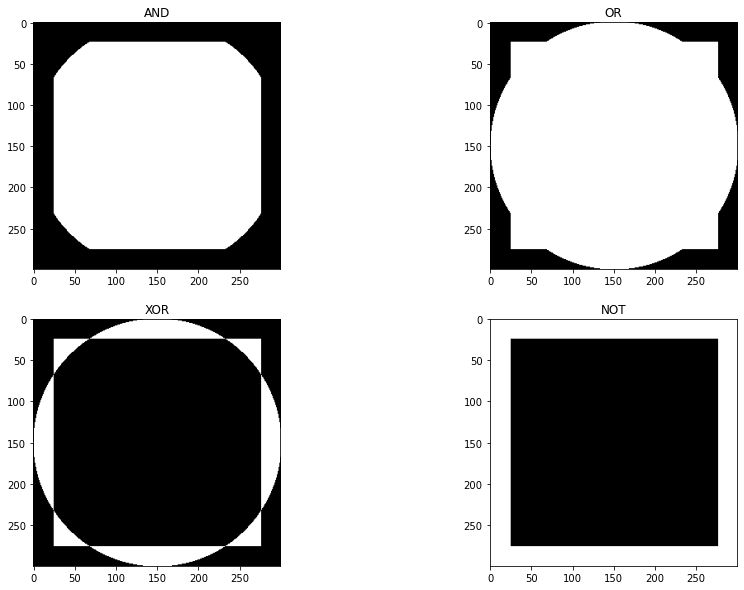

In [21]:
#Bitwise operations
cv2_and = cv2.bitwise_and(rect,cir)#AND if both are greather than zero - on else -off
cv2_and = convert_BGR_to_RGB(cv2_and)

cv2_or = cv2.bitwise_or(rect,cir)#OR - either of the two is greater than zero -on else off
cv2_or = convert_BGR_to_RGB(cv2_or)

cv2_xor = cv2.bitwise_xor(rect,cir)#XOR - either of the two is greater than zero but not both -on else off
cv2_xor = convert_BGR_to_RGB(cv2_xor)

cv2_not = cv2.bitwise_not(rect)#NOT - invert on to off and viceversa
cv2_not = convert_BGR_to_RGB(cv2_not)

fig,ax = plt.subplots(2,2,figsize=(15,10))
ax[0,0].imshow(cv2_and)
ax[0,0].set_title("AND")
ax[0,1].imshow(cv2_or)
ax[0,1].set_title("OR")
ax[1,0].imshow(cv2_xor)
ax[1,0].set_title("XOR")
ax[1,1].imshow(cv2_not)
ax[1,1].set_title("NOT")

## Masking <a id="masking"></a>

(183, 275, 3)


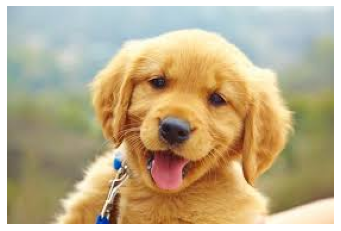

In [22]:
image_cv_org =  cv2.imread(cv_root_dir + "download (1).jpg")
image_cv = convert_BGR_to_RGB(image_cv_org)
plt.imshow(image_cv)
plt.axis("off")
print(image_cv.shape)

(-0.5, 274.5, 182.5, -0.5)

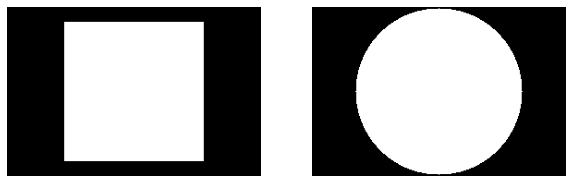

In [23]:
#Build Mask
#Rectangle
rect_mask = np.zeros(image_cv.shape[:2],dtype="uint8")
cx, cy = image_cv.shape[1] // 2, image_cv.shape[0] // 2 #Calculating the center of the image and divide so that floor applied to int
cv2.rectangle(rect_mask,(cx - 75,cy-75),(cx + 75,cy + 75), 255, -1 ) # two points, color, thickness of the border

#Circle
circle_mask = np.zeros(image_cv.shape[:2],dtype="uint8")
cv_circle_mask = cv2.circle(circle_mask, (cx,cy) , 90, 255, -1) #center point, radius, color and thickness

fig,ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(convert_BGR_to_RGB(rect_mask))
ax[0].axis("off")
ax[1].imshow(convert_BGR_to_RGB(circle_mask))
ax[1].axis("off")

Text(0.5, 1.0, 'Applied Circle Mask')

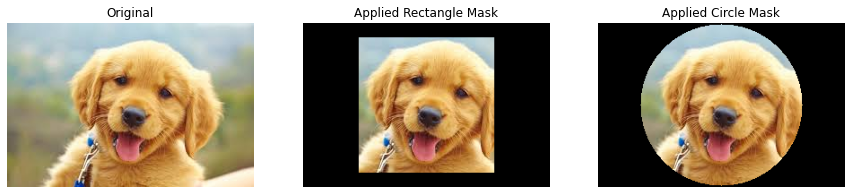

In [24]:
#Apply Mask using the bitwise operations
#here we image_cv_org which is in BGR format for Open CV
rect_mask_app = cv2.bitwise_and(image_cv_org,image_cv_org, mask= rect_mask) #Applying the mask using and as explained above
rect_mask_app = convert_BGR_to_RGB(rect_mask_app)

cir_mask_app = cv2.bitwise_and(image_cv_org,image_cv_org, mask= circle_mask)
cir_mask_app = convert_BGR_to_RGB(cir_mask_app)

fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(image_cv)
ax[0].axis("off")
ax[0].set_title("Original")
ax[1].imshow(rect_mask_app)
ax[1].axis("off")
ax[1].set_title("Applied Rectangle Mask")
ax[2].imshow(cir_mask_app)
ax[2].axis("off")
ax[2].set_title("Applied Circle Mask")

## Splitting and Merging Channels <a id="splitandmerge"></a>

(-0.5, 274.5, 182.5, -0.5)

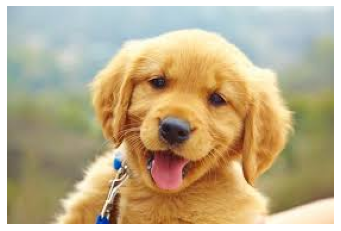

In [25]:
image =  cv2.imread(cv_root_dir + "download (1).jpg")
plt.imshow(convert_BGR_to_RGB(image))
plt.axis("off")

Text(0.5, 1.0, 'Red Channel')

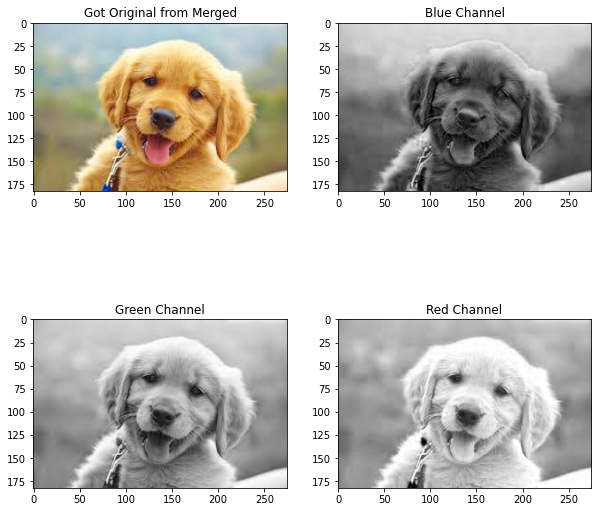

In [26]:
(B,G,R) = cv2.split(image)



fig,ax = plt.subplots(2,2, figsize=(10,10))

ax[0,0].imshow(convert_BGR_to_RGB(cv2.merge([B,G,R])))
ax[0,0].set_title("Got Original from Merged")

ax[0,1].imshow(convert_BGR_to_RGB(B))
ax[0,1].set_title("Blue Channel")

ax[1,0].imshow(convert_BGR_to_RGB(G))
ax[1,0].set_title("Green Channel")

ax[1,1].imshow(convert_BGR_to_RGB(R))
ax[1,1].set_title("Red Channel")

Text(0.5, 1.0, 'Red Channel')

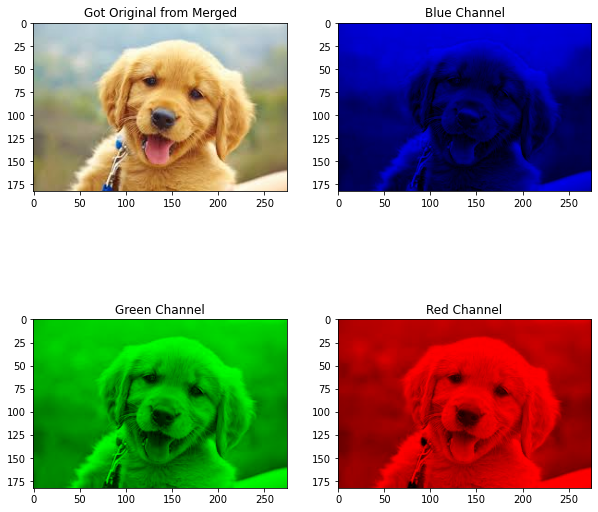

In [27]:
zeros = np.zeros(image.shape[:2], dtype="uint8")
red_channel = convert_BGR_to_RGB(cv2.merge([zeros,zeros, R]))
green_channel = convert_BGR_to_RGB(cv2.merge([zeros,G, zeros]))
blue_channel = convert_BGR_to_RGB(cv2.merge([B,zeros, zeros]))

fig,ax = plt.subplots(2,2, figsize=(10,10))

ax[0,0].imshow(convert_BGR_to_RGB(cv2.merge([B,G,R])))
ax[0,0].set_title("Got Original from Merged")

ax[0,1].imshow(blue_channel)
ax[0,1].set_title("Blue Channel")

ax[1,0].imshow(green_channel)
ax[1,0].set_title("Green Channel")

ax[1,1].imshow(red_channel)
ax[1,1].set_title("Red Channel")

## Color Spaces <a id="colorspace"></a>

(-0.5, 274.5, 182.5, -0.5)

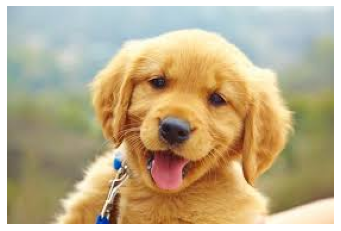

In [28]:
image =  cv2.imread(cv_root_dir + "download (1).jpg")
plt.imshow(convert_BGR_to_RGB(image))
plt.axis("off")

Text(0.5, 1.0, 'L*a*b*')

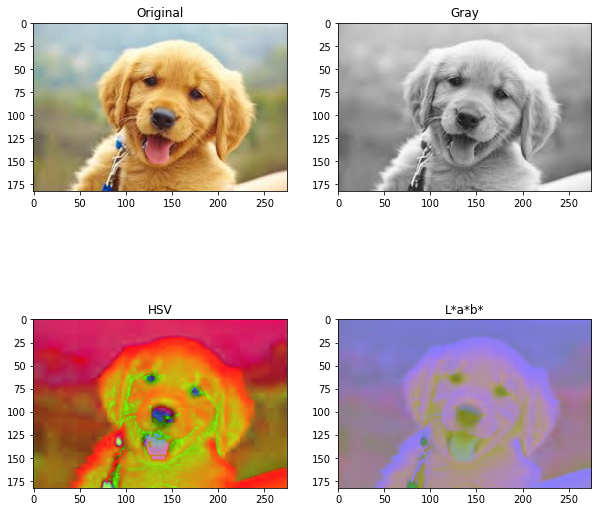

In [29]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

fig,ax = plt.subplots(2,2, figsize=(10,10))

ax[0,0].imshow(convert_BGR_to_RGB(image))
ax[0,0].set_title("Original")

ax[0,1].imshow(convert_BGR_to_RGB(gray))
ax[0,1].set_title("Gray")

ax[1,0].imshow(convert_BGR_to_RGB(hsv))
ax[1,0].set_title("HSV")

ax[1,1].imshow(convert_BGR_to_RGB(lab))
ax[1,1].set_title("L*a*b*")

## Histograms <a id="histogram"></a>

(-0.5, 274.5, 182.5, -0.5)

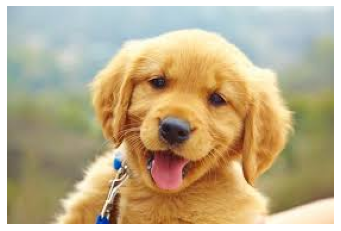

In [30]:
image =  cv2.imread(cv_root_dir + "download (1).jpg")
plt.imshow(convert_BGR_to_RGB(image))
plt.axis("off")

(0.0, 256.0)

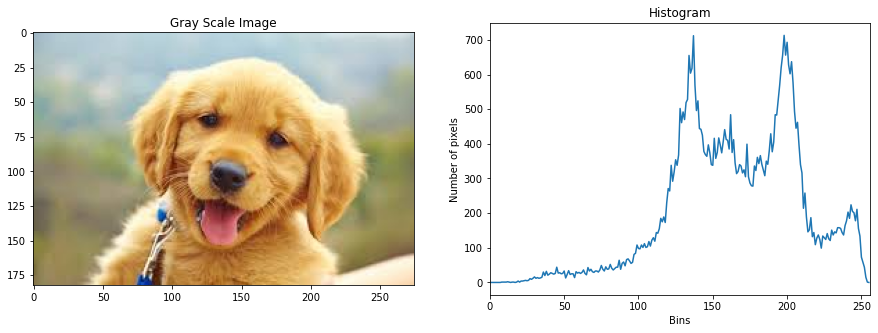

In [31]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#arguments
#images list - pass in the images
#channels list - specify the channels for which the hist need to be calculated
#mask - calc hist only for mask region
#histsize - size or number of bins
#range - possible pixel value - [0,256] for RGB and different values for HSV
hist = cv2.calcHist([gray_image],[0],None,[256],[0,256]) 

fig,ax = plt.subplots(1,2 , figsize=(15,5))
ax[0].imshow(convert_BGR_to_RGB(image))
ax[0].set_title("Gray Scale Image")

ax[1].plot(hist)
ax[1].set_title("Histogram")
ax[1].set_xlabel("Bins")
ax[1].set_ylabel("Number of pixels")
ax[1].set_xlim([0,256])

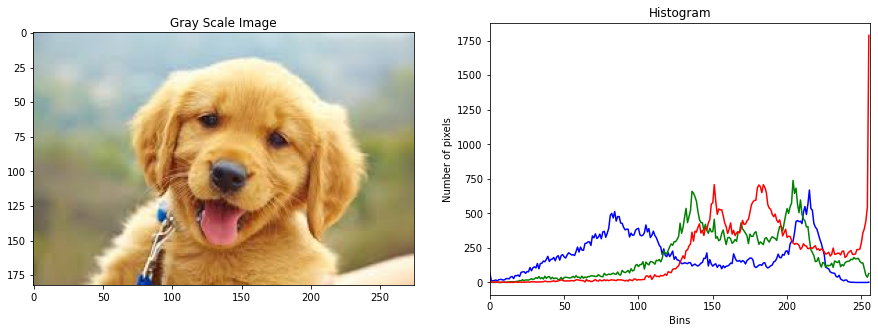

In [32]:
channels = cv2.split(image)
colors = ("b" , "g" ,"r")

fig,ax = plt.subplots(1,2 , figsize=(15,5))
ax[0].imshow(convert_BGR_to_RGB(image))
ax[0].set_title("Gray Scale Image")

ax[1].set_title("Histogram")
ax[1].set_xlabel("Bins")
ax[1].set_ylabel("Number of pixels")
ax[1].set_xlim([0,256])
for (chan, col) in zip(channels, colors):
    hist = cv2.calcHist([chan],[0], None,[256],[0,256])
    ax[1].plot(hist,color = col)
    

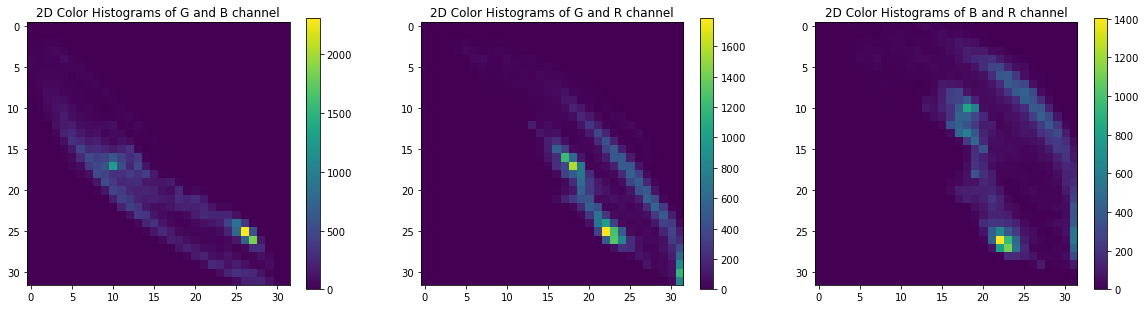

In [33]:
fig,ax = plt.subplots(1,3, figsize=(20,5))

hist_GB = cv2.calcHist([channels[1], channels[0]],[0,1],None, [32,32],[0,256,0,256])
p = ax[0].imshow(hist_GB)
ax[0].set_title("2D Color Histograms of G and B channel")
fig.colorbar(p, ax=ax[0])


hist_GR = cv2.calcHist([channels[1], channels[2]],[0,1],None, [32,32],[0,256,0,256])
p = ax[1].imshow(hist_GR)
ax[1].set_title("2D Color Histograms of G and R channel")
fig.colorbar(p, ax=ax[1])

hist_BR = cv2.calcHist([channels[0], channels[2]],[0,1],None, [32,32],[0,256,0,256])
p = ax[2].imshow(hist_BR)
ax[2].set_title("2D Color Histograms of B and R channel")
fig.colorbar(p, ax=ax[2])

From the result above of 2D, shades of blue represent the low pixel count and shaded of red represent large pixel count

In [34]:
#Similar to 2D , we can do hist of the 3D however plotting wont work
hist = cv2.calcHist([image],[0,1,2],None,[8,8,8],[0,256,0,256,0,256])
print("3D histogram shape: {}, with {} values".format(hist.shape, hist.flatten().shape[0]))


3D histogram shape: (8, 8, 8), with 512 values


(-0.5, 274.5, 182.5, -0.5)

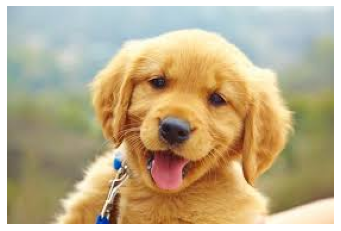

In [35]:
image =  cv2.imread(cv_root_dir + "download (1).jpg")
plt.imshow(convert_BGR_to_RGB(image))
plt.axis("off")

Text(0.5, 1.0, 'Equalized Hist - Gray scale')

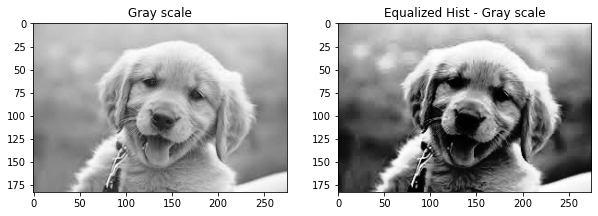

In [36]:
#Equalization
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

eqHist =cv2.equalizeHist(image_gray)

fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].imshow(convert_BGR_to_RGB(image_gray))
ax[0].set_title("Gray scale")

ax[1].imshow(convert_BGR_to_RGB(eqHist))
ax[1].set_title("Equalized Hist - Gray scale")